# Making Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Reading in data

DATA SOURCE: https://www.kaggle.com/c/shared-bikes-demand-prediction

In [2]:
df = pd.read_csv('DATA/day.csv')

In [3]:
test = pd.read_csv('DATA/test.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     499 non-null    int64  
 1   dteday      499 non-null    object 
 2   season      499 non-null    int64  
 3   yr          499 non-null    int64  
 4   mnth        499 non-null    int64  
 5   holiday     499 non-null    int64  
 6   weekday     499 non-null    int64  
 7   workingday  499 non-null    int64  
 8   weathersit  499 non-null    int64  
 9   temp        499 non-null    float64
 10  atemp       499 non-null    float64
 11  hum         499 non-null    float64
 12  windspeed   499 non-null    float64
 13  casual      499 non-null    int64  
 14  registered  499 non-null    int64  
 15  cnt         499 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 62.5+ KB


**No Null values**

In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


### Dropping 'instant' column as it is unique for every row

In [8]:
df.drop('instant',axis=1,inplace=True)

### Checking unique values and their counts of some columns

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
for col in list(df.columns)[1:-1]:
    if df[col].dtype == 'int64':
        print(df[col].value_counts())
        print('*'*18)

1    169
2    147
3     94
4     89
Name: season, dtype: int64
******************
0    365
1    134
Name: yr, dtype: int64
******************
3     62
1     62
4     60
2     56
5     45
12    31
10    31
8     31
7     31
11    30
9     30
6     30
Name: mnth, dtype: int64
******************
0    485
1     14
Name: holiday, dtype: int64
******************
6    72
1    72
0    72
5    71
4    71
2    71
3    70
Name: weekday, dtype: int64
******************
1    341
0    158
Name: workingday, dtype: int64
******************
1    312
2    170
3     17
Name: weathersit, dtype: int64
******************
120     4
140     3
639     3
163     3
244     3
       ..
614     1
1639    1
616     1
618     1
1026    1
Name: casual, Length: 430, dtype: int64
******************
1707    3
2549    2
2419    2
4665    2
1506    2
       ..
1699    1
1700    1
1705    1
1708    1
4097    1
Name: registered, Length: 473, dtype: int64
******************


# Making graphs for better Visualization

In [11]:
df.groupby('season').sum()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,
1,79,426,6,507,113,233,2079.158601,2532.131485,9778.1223,2414.625857,57247,391659,448906
2,55,651,3,440,102,211,3133.105856,3669.513800,9222.1829,2059.160915,147072,523062,670134
3,0,723,2,282,66,125,2702.323202,3073.576850,6059.9627,1116.685355,95450,324200,419650
4,0,952,3,266,60,134,1556.095632,1860.719100,6177.7842,1002.571886,52813,273324,326137


**<u>Observation</u>: Most rentals were made in summer and least in winters which is obvious as people dont prefer riding bikes on winters.**

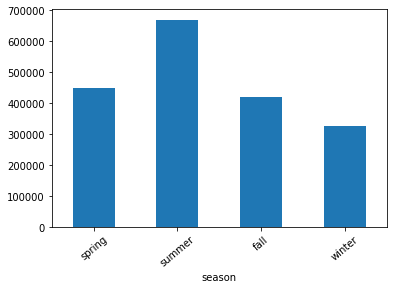

In [12]:
df.groupby('season').sum()['cnt'].plot(kind='bar')
plt.xticks(ticks=np.arange(0,4),labels = ['spring','summer','fall','winter'],rotation=40);

**<u>Observation</u>: Following a similar pattern march, april and may recored most rentals which is because the climate during these months is ideal for riding a bike.**

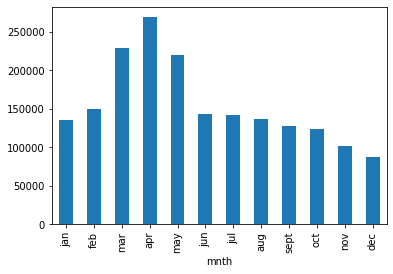

In [13]:
df.groupby('mnth').sum()['cnt'].plot(kind='bar')
plt.xticks(ticks=np.arange(0,12),labels = ['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']);

**<u>Observation</u>: It is also possible that in the months of march, april and may people have vacations so that is why the rentals are very high compared to other months.**

<AxesSubplot:xlabel='holiday'>

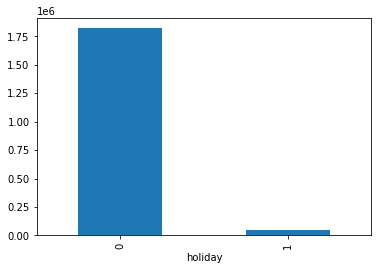

In [14]:
df.groupby('holiday').sum()['cnt'].plot(kind='bar')

**<u>Observation</u>: The day of the week doesn't really affect the number of rentals. ALmost all days have equal rentals except for weekend where the numbers are slightly higher.**

<AxesSubplot:xlabel='weekday'>

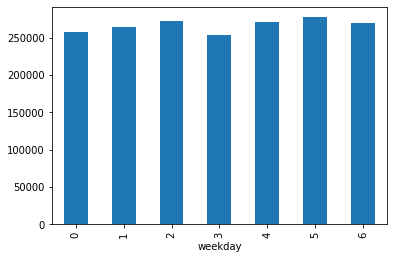

In [15]:
df.groupby('weekday').sum()['cnt'].plot(kind='bar')

**<u>Observation</u>: On working days people prefer taking bikes which is justified as traffic is a big problem everywhere.**

<AxesSubplot:xlabel='workingday'>

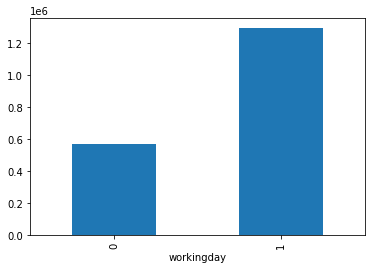

In [16]:
df.groupby('workingday').sum()['cnt'].plot(kind='bar')

**<u>Observation</u>:Most people rent bikes in clear weather as it is very convenient. The numbers are significantly lower on other types of climate especially light snowy days as there is a risk of slipping in such weather conditions.**

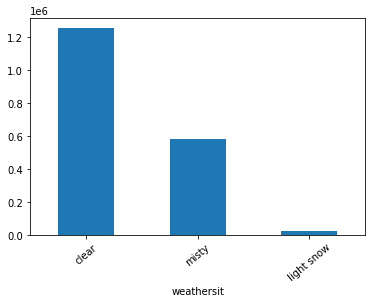

In [17]:
df.groupby('weathersit').sum()['cnt'].plot(kind='bar')
plt.xticks(ticks=np.arange(0,3),labels = ['clear','misty','light snow'],rotation=40);

**<u>Observation</u>: Other variables such as temperature, humidity, windspeed are normally distributed.**

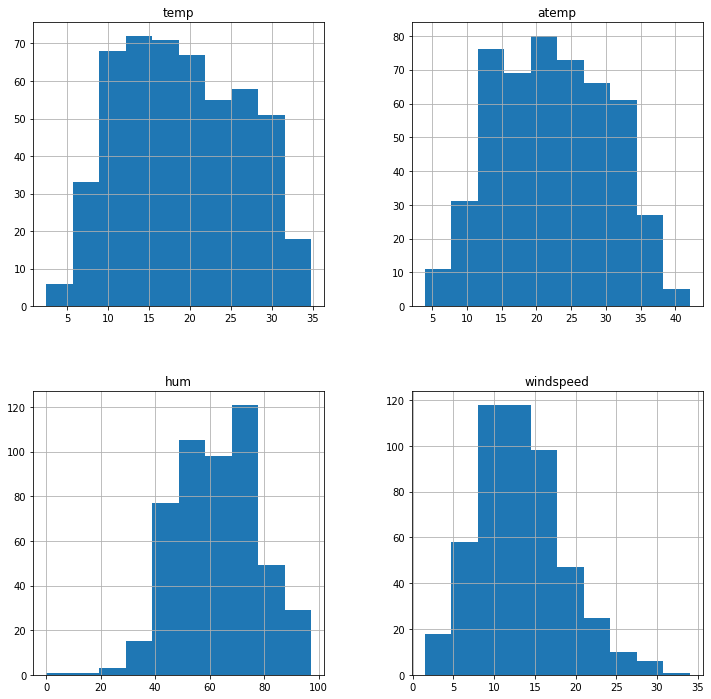

In [18]:
df[['temp','atemp','hum','windspeed']].hist(figsize=(12,12));

### 'registered' is highly correlated with count variable

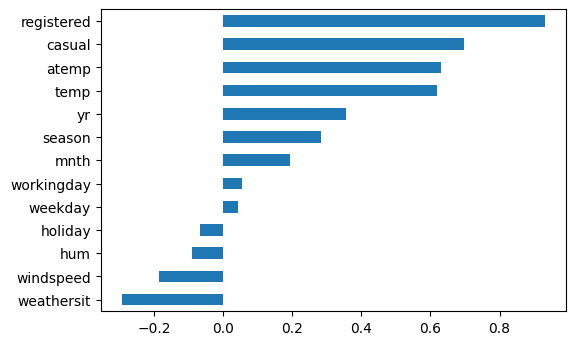

In [19]:
plt.figure(dpi=100)
df.corr()['cnt'].iloc[:-1].sort_values().plot(kind='barh');

## Checking correlations within variables to remove redundant variables.

In [20]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.440651,0.865255,-0.009866,-0.001448,0.010286,0.048987,0.443957,0.447903,0.262581,-0.226985,0.212756,0.256280,0.283648
yr,-0.440651,1.000000,-0.482860,0.006585,-0.010055,-0.005552,-0.038843,-0.218894,-0.210723,-0.190814,0.121607,0.078743,0.417900,0.355828
mnth,0.865255,-0.482860,1.000000,0.009797,0.015901,0.002961,0.029104,0.383480,0.390125,0.264647,-0.232266,0.143103,0.175519,0.193226
holiday,-0.009866,0.006585,0.009797,1.000000,-0.102455,-0.249598,-0.037576,-0.028749,-0.038892,-0.049892,0.035696,0.040028,-0.107448,-0.067509
weekday,-0.001448,-0.010055,0.015901,-0.102455,1.000000,0.035133,0.058871,-0.012603,-0.012535,-0.027003,0.016162,0.026341,0.042210,0.043256
workingday,0.010286,-0.005552,0.002961,-0.249598,0.035133,1.000000,0.058771,0.058716,0.063088,0.026035,-0.009758,-0.502092,0.326616,0.053859
weathersit,0.048987,-0.038843,0.029104,-0.037576,0.058871,0.058771,1.000000,-0.070571,-0.072851,0.584478,0.026112,-0.216683,-0.266699,-0.293301
temp,0.443957,-0.218894,0.383480,-0.028749,-0.012603,0.058716,-0.070571,1.000000,0.996325,0.184930,-0.132151,0.527648,0.525363,0.617873
atemp,0.447903,-0.210723,0.390125,-0.038892,-0.012535,0.063088,-0.072851,0.996325,1.000000,0.195306,-0.157681,0.531608,0.537689,0.629020
hum,0.262581,-0.190814,0.264647,-0.049892,-0.027003,0.026035,0.584478,0.184930,0.195306,1.000000,-0.279102,-0.042922,-0.095201,-0.091001


### Dropping 'atemp' column as it is highly correlated to 'temp' column

In [21]:
df.drop('atemp',axis=1,inplace=True) 

In [22]:
df.drop('dteday',axis=1,inplace=True)

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


## Splitting data to train and test sets

In [24]:
X = df.drop('cnt',axis=1)
y = df['cnt']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [26]:
X_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered
336,4,0,12,0,6,0,1,12.265847,61.2917,6.417481,706,2908
271,4,0,9,0,4,1,1,25.283347,69.9167,11.583161,653,4186
141,2,0,5,0,0,0,1,24.770847,74.9583,9.916536,1576,3084
228,3,0,8,0,3,1,1,29.656653,57.5417,9.625689,668,4026
168,2,0,6,0,6,0,1,28.563347,67.0417,8.000336,1807,3312


## Model building and making Predictions

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"MEAN SQUARED ERROR: {mean_squared_error(y_test, y_pred)}")
print(f"ROOT MEAN SQUARED ERROR: {np.sqrt(mean_squared_error(y_test, y_pred))}")

MEAN SQUARED ERROR: 25579.397970400005
ROOT MEAN SQUARED ERROR: 159.9356056992939


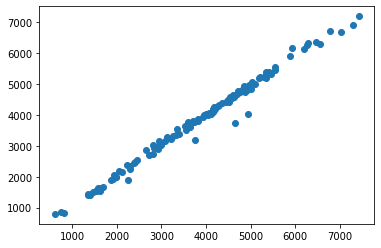

In [28]:
plt.figure()
plt.scatter(y_test,y_pred);

## R2_SCORE

In [33]:
r2_score(y_test,y_pred)

0.9888683860169842

## Combinig all data and training our model again

In [36]:
rf_final = RandomForestRegressor()
rf_final.fit(X,y)

RandomForestRegressor()

## Preprocessing the given test set

In [38]:
test.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,501,16-05-2019,2,1,5,0,3,1,1,26.103347,29.79875,69.7917,8.208304,991,6433
1,502,17-05-2019,2,1,5,0,4,1,1,24.326653,28.63065,52.0000,15.374825,1242,6142
2,503,18-05-2019,2,1,5,0,5,1,1,23.130847,27.55605,52.3333,9.166739,1521,6118
3,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884
4,505,20-05-2019,2,1,5,0,0,0,1,25.454153,29.19835,53.0417,17.042589,2704,4425


In [39]:
test.drop(['instant','dteday','atemp'],axis=1,inplace=True)

In [42]:
test.shape

(230, 12)

## Making Predictions of test set

In [44]:
y_pred_final = rf_final.predict(test)

In [47]:
#y_pred_final